# Simple Chatbot with Langgraph with LLM only

In [8]:
import os
import sys
from langchain_groq import ChatGroq
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END
from langgraph.graph.message import add_messages

In [2]:
groq_api_key = os.getenv("GROQ_API_KEY")
langsmith_api_key = os.getenv("LANGCHAIN_API_KEY")
os.environ["LANGCHAIN_API_KEY"] = langsmith_api_key
os.environ["LANGCHAIN_TRACING_V2"]="true"
os.environ["LANGCHAIN_PROJECT"]="CourseLanggraph"

Reason for using GROQ: Fast AI inference for openly-available models (Low latency)

In [7]:
llm=ChatGroq(groq_api_key=groq_api_key,model_name="Gemma2-9b-It")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x1222af9a0>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x1222bc6d0>, model_name='Gemma2-9b-It', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [9]:
class State(TypedDict):
  # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
  messages:Annotated[list,add_messages]

graph_builder=StateGraph(State)

In [10]:
graph_builder

In [11]:
def chatbot(state:State):
  return {"messages":llm.invoke(state['messages'])}

In [12]:
graph_builder.add_node("chatbot",chatbot)

In [13]:
graph_builder

In [14]:
graph_builder.add_edge(START,"chatbot")
graph_builder.add_edge("chatbot",END)

In [15]:
graph=graph_builder.compile()

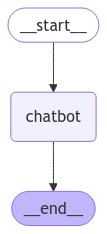

In [16]:
from IPython.display import Image, display
try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
  pass

In [17]:
while True:
  user_input=input("User: ")
  if user_input.lower() in ["quit","q"]:
    print("Good Bye")
    break
  for event in graph.stream({'messages':("user",user_input)}):
    print(event.values())
    for value in event.values():
      print(value['messages'])
      print("Assistant:",value["messages"].content)

dict_values([{'messages': AIMessage(content='Hello! 👋 How can I help you today? 😊\n', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 14, 'prompt_tokens': 10, 'total_tokens': 24, 'completion_time': 0.025454545, 'prompt_time': 4.3e-07, 'queue_time': 0.014505758, 'total_time': 0.025454975}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run-a77921ea-db33-43a7-bba5-4f22fd76c2b2-0', usage_metadata={'input_tokens': 10, 'output_tokens': 14, 'total_tokens': 24})}])
content='Hello! 👋 How can I help you today? 😊\n' additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 14, 'prompt_tokens': 10, 'total_tokens': 24, 'completion_time': 0.025454545, 'prompt_time': 4.3e-07, 'queue_time': 0.014505758, 'total_time': 0.025454975}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None} id='run-a77921ea-db33-43a7-bba5-4f22fd76c2b